### The Data
This book builds on previous notebooks regarding feature enginnering and feature selection however in this book we will train a model per 1JHC and 1JHN coupling types. We will additionally feature enhance those datasets by more details about the eletronic structure of the molecules.

Note: this book will only consider data from the following csv files: train, structures and molecule_structures


In [1]:
import pandas as pd

input_folder = './input'

train = pd.read_csv(f'{input_folder}/train.csv')
structures = pd.read_csv(f'{input_folder}/structures.csv')
molecular_structures = pd.read_csv(f'{input_folder}/molecule_structures.csv')


In [2]:
f'Train shape: {train.shape}'

'Train shape: (4658147, 6)'

In [3]:
f'Structures shape: {structures.shape}'

'Structures shape: (2358657, 6)'

In [4]:
f'molecular structures shape: {molecular_structures.shape}'

'molecular structures shape: (1586325, 32)'

In [5]:
print(f"There are {train['type'].nunique()} unique coupling types: {train['type'].unique()}")

There are 8 unique coupling types: ['1JHC' '2JHH' '1JHN' '2JHN' '2JHC' '3JHH' '3JHC' '3JHN']


#### Merging training and structure data sources into one training data

Code for joining data is from this kernel: https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark

In [6]:
def map_atom_info(df, atom_idx):
    df = pd.merge(df, structures, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'atom': f'atom_{atom_idx}',
                            'x': f'x_{atom_idx}',
                            'y': f'y_{atom_idx}',
                            'z': f'z_{atom_idx}'})
    return df

In [7]:
train = map_atom_info(train, 0)
train = map_atom_info(train, 1)

In [8]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


#### Merging new training and molecule_structures data sources into one training data

In [9]:
def map_molecule_info(df):
    df = pd.merge(df, molecular_structures, how = 'left',
                  left_on  = ['molecule_name', 'atom_index_0', 'atom_index_1'],
                  right_on = ['molecule_name',  'atom_0', 'atom_1'])
    
    df = df.drop('atom_0_y', axis=1)
    df = df.drop('atom_1_y', axis=1)
    df = df.drop('atom_1_1_level_NB', axis=1)
    df = df.drop('atom_1_2_level_NB', axis=1)
    
    df = df.rename(columns={'atom_0_x': 'atom_0',
                            'atom_1_x': 'atom_1'})
    return df

In [10]:
train = map_molecule_info(train)

In [11]:
print(train.shape)

(4658147, 41)


In [12]:
import pandas

pandas.set_option('display.max_columns', None)

train.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091952
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,H,1.011731,1.463751,0.000277,H,-0.523814,1.437933,0.906397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091946
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,H,-0.540815,1.447527,-0.876644,H,-0.523814,1.437933,0.906397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.091948


In [13]:
import numpy as np

train.iloc[:,14:40] = train.iloc[:,14:40].fillna(0.0).astype(np.int8)
train.iloc[:,2:4] = train.iloc[:,2:4].astype(np.int8)
train.head()


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.091952


In [14]:
train.loc[train['molecule_name'] == 'dsgdb9nsd_000050']

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,bond_length
696,696,dsgdb9nsd_000050,5,0,1JHN,59.301000,H,-0.832432,1.927727,0.021230,N,-0.008297,1.353628,0.009960,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.004448
697,697,dsgdb9nsd_000050,5,1,2JHC,2.826250,H,-0.832432,1.927727,0.021230,C,1.280333,1.824574,-0.000225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
698,698,dsgdb9nsd_000050,5,2,3JHC,6.737830,H,-0.832432,1.927727,0.021230,C,2.122166,0.736989,-0.014456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
699,699,dsgdb9nsd_000050,5,3,3JHC,6.737890,H,-0.832432,1.927727,0.021230,C,1.308499,-0.431096,-0.012842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
700,700,dsgdb9nsd_000050,5,4,2JHC,2.826320,H,-0.832432,1.927727,0.021230,C,-0.003428,-0.018369,0.002357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
701,701,dsgdb9nsd_000050,5,6,3JHH,0.689723,H,-0.832432,1.927727,0.021230,H,1.484718,2.883126,0.003543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
702,702,dsgdb9nsd_000050,5,9,3JHH,0.689683,H,-0.832432,1.927727,0.021230,H,-0.925516,-0.576971,0.008394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
703,703,dsgdb9nsd_000050,6,0,2JHN,3.805590,H,1.484718,2.883126,0.003543,N,-0.008297,1.353628,0.009960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
704,704,dsgdb9nsd_000050,6,1,1JHC,125.638000,H,1.484718,2.883126,0.003543,C,1.280333,1.824574,-0.000225,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.078110
705,705,dsgdb9nsd_000050,6,2,2JHC,5.964290,H,1.484718,2.883126,0.003543,C,2.122166,0.736989,-0.014456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


### Basic Feature engineering
#### Distances between atoms

In [17]:
def add_distances(df):
    df['abs_dx']=(df['x_1']-df['x_0']).abs()
    #df['abs_dx']=df['abs_dx'].abs()
    df['abs_dy']=(df['y_1']-df['y_0']).abs()
    #df['abs_dx']=df['abs_dx'].abs()
    df['abs_dz']=(df['z_1']-df['z_0']).abs()
    #df['abs_dx']=df['abs_dx'].abs()
    #df['dx2']=df['dx']**2
    #df['dy2']=df['dy']**2
    #df['dz2']=df['dz']**2
    df['distance']=(df['abs_dx']**2 + df['abs_dy']**2 + df['abs_dz']**2)**(1/2)
    return df

In [18]:
train=add_distances(train)

In [19]:
import numpy as np

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
                    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [20]:
def additional_features(df):
    df['molecule_couples'] = df.groupby('molecule_name')['id'].transform('count')
    df['molecule_dist_mean'] = df.groupby('molecule_name')['distance'].transform('mean')
    df['molecule_dist_min'] = df.groupby('molecule_name')['distance'].transform('min')
    df['molecule_dist_max'] = df.groupby('molecule_name')['distance'].transform('max')
    df['molecule_dist_std'] = df.groupby('molecule_name')['distance'].transform('std')
    df['atom_0_couples_count'] = df.groupby(['molecule_name', 'atom_index_0'])['id'].transform('count')
    df['atom_1_couples_count'] = df.groupby(['molecule_name', 'atom_index_1'])['id'].transform('count')

    num_cols = ['distance'] # 'dx', 'dy', 'dz'
    cat_cols = ['atom_index_0', 'atom_index_1']
    aggs = ['mean', 'std', 'max', 'min']
    for col in cat_cols:
        df[f'molecule_{col}_count'] = df.groupby('molecule_name')[col].transform('count')

    for cat_col in cat_cols:
        for num_col in num_cols:
            for agg in aggs:
                df[f'molecule_{cat_col}_{num_col}_{agg}'] = df.groupby(['molecule_name', cat_col])[num_col].transform(agg)
                df[f'molecule_{cat_col}_{num_col}_{agg}_diff'] = df[f'molecule_{cat_col}_{num_col}_{agg}'] - df[num_col]
                df[f'molecule_{cat_col}_{num_col}_{agg}_div'] = df[f'molecule_{cat_col}_{num_col}_{agg}'] / df[num_col]

    df = reduce_mem_usage(df)
    return df

In [21]:
train=additional_features(train)

Mem. usage decreased to 1776.94 Mb (8.3% reduction)


In [22]:
train = train.drop('id', axis=1)
train = train.drop('molecule_name', axis=1)
train = train.drop('bond_length', axis=1)

In [24]:
train.dtypes

atom_index_0                                   int8
atom_index_1                                   int8
type                                         object
scalar_coupling_constant                    float64
atom_0                                       object
x_0                                         float64
y_0                                         float64
z_0                                         float64
atom_1                                       object
x_1                                         float64
y_1                                         float64
z_1                                         float64
atom_0_CH3                                     int8
atom_1_CH3                                     int8
atom_0_CH2                                     int8
atom_1_CH2                                     int8
atom_0_CH1                                     int8
atom_1_CH1                                     int8
atom_0_CH0                                     int8
atom_1_CH0  

#### Let's split the data into different datasets based on coupling types

In [25]:
train_map={}
selected_types = ['1JHC', '1JHN']
for coupling_type, df_by_type in train.groupby('type'):
    df_by_type = df_by_type.drop('type', axis=1)
    if coupling_type in selected_types:
        train_map[coupling_type] = df_by_type

In [26]:
train_map.keys()

dict_keys(['1JHC', '1JHN'])

In [27]:
[df.shape for df in train_map.values()]

[(709416, 74), (43363, 74)]

### Data splitting

In [28]:
train_map['1JHC'].columns

Index(['atom_index_0', 'atom_index_1', 'scalar_coupling_constant', 'atom_0',
       'x_0', 'y_0', 'z_0', 'atom_1', 'x_1', 'y_1', 'z_1', 'atom_0_CH3',
       'atom_1_CH3', 'atom_0_CH2', 'atom_1_CH2', 'atom_0_CH1', 'atom_1_CH1',
       'atom_0_CH0', 'atom_1_CH0', 'atom_0_NH2', 'atom_1_NH2', 'atom_0_NH1',
       'atom_1_NH1', 'atom_0_NH0', 'atom_1_NH0', 'atom_0_OH1', 'atom_1_OH1',
       'atom_0_OH0', 'atom_1_OH0', 'is_in_ring', 'has_aromatic_bond',
       'is_primary_amide', 'is_secondary_amide', 'is_tertiary_amide',
       'is_ester', 'is_carbonyl', 'bond_order', 'abs_dx', 'abs_dy', 'abs_dz',
       'distance', 'molecule_couples', 'molecule_dist_mean',
       'molecule_dist_min', 'molecule_dist_max', 'molecule_dist_std',
       'atom_0_couples_count', 'atom_1_couples_count',
       'molecule_atom_index_0_count', 'molecule_atom_index_1_count',
       'molecule_atom_index_0_distance_mean',
       'molecule_atom_index_0_distance_mean_diff',
       'molecule_atom_index_0_distance_mean_div',

In [29]:
from sklearn.model_selection import train_test_split

train_map_split = {}
for key, dataset in train_map.items():
    y = dataset['scalar_coupling_constant']
    X = dataset.drop('scalar_coupling_constant', axis=1)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 13, test_size = 0.25)
    train_map_split[key] = (X_train, X_valid, y_train, y_valid)

In [30]:
train_map_split['1JHC'][0].head()

,atom_index_0,atom_index_1,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,atom_0_CH3,atom_1_CH3,atom_0_CH2,atom_1_CH2,atom_0_CH1,atom_1_CH1,atom_0_CH0,atom_1_CH0,atom_0_NH2,atom_1_NH2,atom_0_NH1,atom_1_NH1,atom_0_NH0,atom_1_NH0,atom_0_OH1,atom_1_OH1,atom_0_OH0,atom_1_OH0,is_in_ring,has_aromatic_bond,is_primary_amide,is_secondary_amide,is_tertiary_amide,is_ester,is_carbonyl,bond_order,abs_dx,abs_dy,abs_dz,distance,molecule_couples,molecule_dist_mean,molecule_dist_min,molecule_dist_max,molecule_dist_std,atom_0_couples_count,atom_1_couples_count,molecule_atom_index_0_count,molecule_atom_index_1_count,molecule_atom_index_0_distance_mean,molecule_atom_index_0_distance_mean_diff,molecule_atom_index_0_distance_mean_div,molecule_atom_index_0_distance_std,molecule_atom_index_0_distance_std_diff,molecule_atom_index_0_distance_std_div,molecule_atom_index_0_distance_max,molecule_atom_index_0_distance_max_diff,molecule_atom_index_0_distance_max_div,molecule_atom_index_0_distance_min,molecule_atom_index_0_distance_min_diff,molecule_atom_index_0_distance_min_div,molecule_atom_index_1_distance_mean,molecule_atom_index_1_distance_mean_diff,molecule_atom_index_1_distance_mean_div,molecule_atom_index_1_distance_std,molecule_atom_index_1_distance_std_diff,molecule_atom_index_1_distance_std_div,molecule_atom_index_1_distance_max,molecule_atom_index_1_distance_max_diff,molecule_atom_index_1_distance_max_div,molecule_atom_index_1_distance_min,molecule_atom_index_1_distance_min_diff,molecule_atom_index_1_distance_min_div
2662234,17,6,H,-0.848313,-0.722608,2.695692,C,0.181974,-0.355070,2.639212,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.030287,0.367538,0.056480,1.095338,84,2.498850,1.081816,3.595365,0.770084,6,6,84,84,2.396907,1.301569,2.188281,0.891266,-0.204072,0.813691,3.545634,2.450296,3.237023,1.095338,0.0,1.0,2.007808,0.912470,1.833049,1.000389,-0.094949,0.913316,2.994453,1.899115,2.733817,1.094863,-0.000475,0.999567
1861995,21,6,H,1.680221,-2.124947,-3.178018,C,2.009854,-2.357947,-2.154981,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.329633,0.233000,1.023037,1.099796,128,2.376618,1.093531,3.531560,0.695202,11,11,128,128,2.429165,1.329369,2.208741,0.556819,-0.542977,0.506293,3.067245,1.967448,2.788920,1.099796,0.0,1.0,2.328297,1.228501,2.117026,0.589696,-0.510101,0.536186,3.271329,2.171533,2.974486,1.099796,0.000000,1.000000
1413733,14,6,H,3.378742,3.861877,0.385266,C,2.536057,3.249472,0.708234,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.842685,0.612405,0.322967,1.090627,61,2.392528,1.086376,3.491027,0.714768,8,6,61,61,2.420566,1.329940,2.219427,0.748743,-0.341883,0.686526,3.410481,2.319854,3.127084,1.090627,0.0,1.0,1.994817,0.904190,1.829056,0.769018,-0.321608,0.705116,3.061795,1.971169,2.807373,1.090627,0.000000,1.000000
121298,10,0,H,-0.583418,1.810196,0.852186,C,0.004972,1.360666,0.046756,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.588390,0.449531,0.805430,1.094074,30,2.201390,1.005773,3.245545,0.810305,2,3,30,30,1.862922,0.768848,1.702738,1.087315,-0.006759,0.993822,2.631770,1.537696,2.405476,1.094074,0.0,1.0,1.092900,-0.001174,0.998927,0.001996,-1.092078,0.001824,1.094074,0.000000,1.000000,1.090596,-0.003479,0.996821
4643406,11,0,H,0.440245,1.771128,1.077663,C,0.017357,1.434540,0.123716,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.422888,0.336588,0.953947,1.096422,16,2.081672,1.084953,3.334177,0.783965,3,3,16,16,2.079825,0.983403,1.896921,0.986396,-0.110026,0.899650,3.069186,1.972765,2.799275,1.096422,0.0,1.0,1.095962,-0.000460,0.999580,0.000785,-1.095637,0.000716,1.096422,0.000000,1.000000,1.095056,-0.001366,0.998754


#### Cleanup - we need the resources

In [31]:
import gc

del train
del structures
del molecular_structures

for key, dataset in train_map.items():
    del dataset
train_map.clear()

gc.collect()

61

### The model

In [32]:
from catboost import CatBoostRegressor

cat_features_index = np.where(train_map_split['1JHC'][0].dtypes != float)[0]

model_map = {}
for key, datasets in train_map_split.items():
    f'Training model on coupling type: {key}'

    model = CatBoostRegressor(iterations=2000, depth= 13, random_seed = 23, task_type = "GPU", devices='0')
    model.fit(datasets[0], datasets[2], eval_set=(datasets[1], datasets[3]), cat_features=cat_features_index, logging_level='Verbose')
    model_map[key] = model

0:	learn: 93.8397990	test: 93.8429933	best: 93.8429933 (0)	total: 3.67s	remaining: 2h 2m 27s
1:	learn: 91.0392693	test: 91.0422963	best: 91.0422963 (1)	total: 3.8s	remaining: 1h 3m 19s
2:	learn: 88.3320906	test: 88.3326870	best: 88.3326870 (2)	total: 4.08s	remaining: 45m 14s
3:	learn: 85.7022877	test: 85.7013235	best: 85.7013235 (3)	total: 4.34s	remaining: 36m 7s
4:	learn: 83.1515228	test: 83.1488596	best: 83.1488596 (4)	total: 4.62s	remaining: 30m 43s
5:	learn: 80.6789701	test: 80.6751309	best: 80.6751309 (5)	total: 4.88s	remaining: 27m 3s
6:	learn: 78.2786632	test: 78.2726285	best: 78.2726285 (6)	total: 5.17s	remaining: 24m 30s
7:	learn: 75.9493238	test: 75.9407947	best: 75.9407947 (7)	total: 5.46s	remaining: 22m 39s
8:	learn: 73.6921319	test: 73.6826240	best: 73.6826240 (8)	total: 5.71s	remaining: 21m 4s
9:	learn: 71.5006472	test: 71.4901235	best: 71.4901235 (9)	total: 5.92s	remaining: 19m 38s
10:	learn: 69.3743968	test: 69.3625516	best: 69.3625516 (10)	total: 6.21s	remaining: 18m 4

90:	learn: 7.6370725	test: 7.6076703	best: 7.6076703 (90)	total: 28.6s	remaining: 9m 59s
91:	learn: 7.4857046	test: 7.4565701	best: 7.4565701 (91)	total: 28.8s	remaining: 9m 58s
92:	learn: 7.3402530	test: 7.3114916	best: 7.3114916 (92)	total: 29.1s	remaining: 9m 56s
93:	learn: 7.2011586	test: 7.1726477	best: 7.1726477 (93)	total: 29.4s	remaining: 9m 55s
94:	learn: 7.0661041	test: 7.0380459	best: 7.0380459 (94)	total: 29.6s	remaining: 9m 54s
95:	learn: 6.9362615	test: 6.9085925	best: 6.9085925 (95)	total: 29.9s	remaining: 9m 52s
96:	learn: 6.8131336	test: 6.7857127	best: 6.7857127 (96)	total: 30.2s	remaining: 9m 51s
97:	learn: 6.6945221	test: 6.6674976	best: 6.6674976 (97)	total: 30.4s	remaining: 9m 50s
98:	learn: 6.5804860	test: 6.5538276	best: 6.5538276 (98)	total: 30.7s	remaining: 9m 48s
99:	learn: 6.4707340	test: 6.4446851	best: 6.4446851 (99)	total: 31s	remaining: 9m 48s
100:	learn: 6.3643894	test: 6.3387139	best: 6.3387139 (100)	total: 31.2s	remaining: 9m 46s
101:	learn: 6.2631054

181:	learn: 4.0030729	test: 4.0308260	best: 4.0308260 (181)	total: 53.7s	remaining: 8m 56s
182:	learn: 3.9964824	test: 4.0248134	best: 4.0248134 (182)	total: 54s	remaining: 8m 56s
183:	learn: 3.9902463	test: 4.0190198	best: 4.0190198 (183)	total: 54.3s	remaining: 8m 55s
184:	learn: 3.9841179	test: 4.0133091	best: 4.0133091 (184)	total: 54.6s	remaining: 8m 55s
185:	learn: 3.9789742	test: 4.0083489	best: 4.0083489 (185)	total: 54.9s	remaining: 8m 55s
186:	learn: 3.9740717	test: 4.0038825	best: 4.0038825 (186)	total: 55.1s	remaining: 8m 54s
187:	learn: 3.9691543	test: 3.9993300	best: 3.9993300 (187)	total: 55.4s	remaining: 8m 54s
188:	learn: 3.9647022	test: 3.9951475	best: 3.9951475 (188)	total: 55.7s	remaining: 8m 53s
189:	learn: 3.9601585	test: 3.9909503	best: 3.9909503 (189)	total: 56s	remaining: 8m 53s
190:	learn: 3.9541346	test: 3.9851686	best: 3.9851686 (190)	total: 56.3s	remaining: 8m 52s
191:	learn: 3.9486848	test: 3.9801781	best: 3.9801781 (191)	total: 56.6s	remaining: 8m 52s
192

271:	learn: 3.6491835	test: 3.7160244	best: 3.7160244 (271)	total: 1m 19s	remaining: 8m 22s
272:	learn: 3.6455626	test: 3.7129816	best: 3.7129816 (272)	total: 1m 19s	remaining: 8m 21s
273:	learn: 3.6417924	test: 3.7096636	best: 3.7096636 (273)	total: 1m 19s	remaining: 8m 21s
274:	learn: 3.6368291	test: 3.7053224	best: 3.7053224 (274)	total: 1m 19s	remaining: 8m 21s
275:	learn: 3.6325754	test: 3.7016199	best: 3.7016199 (275)	total: 1m 20s	remaining: 8m 20s
276:	learn: 3.6301808	test: 3.6996716	best: 3.6996716 (276)	total: 1m 20s	remaining: 8m 20s
277:	learn: 3.6269235	test: 3.6971866	best: 3.6971866 (277)	total: 1m 20s	remaining: 8m 20s
278:	learn: 3.6244922	test: 3.6953034	best: 3.6953034 (278)	total: 1m 21s	remaining: 8m 19s
279:	learn: 3.6209524	test: 3.6920893	best: 3.6920893 (279)	total: 1m 21s	remaining: 8m 19s
280:	learn: 3.6185593	test: 3.6900544	best: 3.6900544 (280)	total: 1m 21s	remaining: 8m 18s
281:	learn: 3.6158539	test: 3.6878639	best: 3.6878639 (281)	total: 1m 21s	remain

361:	learn: 3.4167781	test: 3.5177084	best: 3.5177084 (361)	total: 1m 43s	remaining: 7m 49s
362:	learn: 3.4141080	test: 3.5156439	best: 3.5156439 (362)	total: 1m 44s	remaining: 7m 49s
363:	learn: 3.4128479	test: 3.5145808	best: 3.5145808 (363)	total: 1m 44s	remaining: 7m 49s
364:	learn: 3.4111393	test: 3.5130402	best: 3.5130402 (364)	total: 1m 44s	remaining: 7m 48s
365:	learn: 3.4086922	test: 3.5109737	best: 3.5109737 (365)	total: 1m 44s	remaining: 7m 48s
366:	learn: 3.4061636	test: 3.5088054	best: 3.5088054 (366)	total: 1m 45s	remaining: 7m 47s
367:	learn: 3.4041963	test: 3.5072164	best: 3.5072164 (367)	total: 1m 45s	remaining: 7m 47s
368:	learn: 3.4013070	test: 3.5048944	best: 3.5048944 (368)	total: 1m 45s	remaining: 7m 47s
369:	learn: 3.3995097	test: 3.5033460	best: 3.5033460 (369)	total: 1m 45s	remaining: 7m 46s
370:	learn: 3.3977596	test: 3.5019809	best: 3.5019809 (370)	total: 1m 46s	remaining: 7m 46s
371:	learn: 3.3954631	test: 3.4999781	best: 3.4999781 (371)	total: 1m 46s	remain

451:	learn: 3.2511809	test: 3.3809943	best: 3.3809943 (451)	total: 2m 8s	remaining: 7m 20s
452:	learn: 3.2491990	test: 3.3792115	best: 3.3792115 (452)	total: 2m 8s	remaining: 7m 20s
453:	learn: 3.2479469	test: 3.3782060	best: 3.3782060 (453)	total: 2m 9s	remaining: 7m 20s
454:	learn: 3.2462626	test: 3.3769885	best: 3.3769885 (454)	total: 2m 9s	remaining: 7m 19s
455:	learn: 3.2439255	test: 3.3749861	best: 3.3749861 (455)	total: 2m 9s	remaining: 7m 19s
456:	learn: 3.2417280	test: 3.3732701	best: 3.3732701 (456)	total: 2m 10s	remaining: 7m 19s
457:	learn: 3.2403783	test: 3.3721445	best: 3.3721445 (457)	total: 2m 10s	remaining: 7m 18s
458:	learn: 3.2390365	test: 3.3711350	best: 3.3711350 (458)	total: 2m 10s	remaining: 7m 18s
459:	learn: 3.2380654	test: 3.3702344	best: 3.3702344 (459)	total: 2m 10s	remaining: 7m 18s
460:	learn: 3.2363242	test: 3.3688727	best: 3.3688727 (460)	total: 2m 11s	remaining: 7m 18s
461:	learn: 3.2344419	test: 3.3673963	best: 3.3673963 (461)	total: 2m 11s	remaining: 

541:	learn: 3.1078642	test: 3.2693216	best: 3.2693216 (541)	total: 2m 33s	remaining: 6m 53s
542:	learn: 3.1065009	test: 3.2682466	best: 3.2682466 (542)	total: 2m 34s	remaining: 6m 53s
543:	learn: 3.1057683	test: 3.2677032	best: 3.2677032 (543)	total: 2m 34s	remaining: 6m 53s
544:	learn: 3.1039788	test: 3.2660991	best: 3.2660991 (544)	total: 2m 34s	remaining: 6m 52s
545:	learn: 3.1022142	test: 3.2647803	best: 3.2647803 (545)	total: 2m 34s	remaining: 6m 52s
546:	learn: 3.1011400	test: 3.2638003	best: 3.2638003 (546)	total: 2m 35s	remaining: 6m 52s
547:	learn: 3.0995392	test: 3.2623397	best: 3.2623397 (547)	total: 2m 35s	remaining: 6m 51s
548:	learn: 3.0981182	test: 3.2611786	best: 3.2611786 (548)	total: 2m 35s	remaining: 6m 51s
549:	learn: 3.0969276	test: 3.2601264	best: 3.2601264 (549)	total: 2m 35s	remaining: 6m 51s
550:	learn: 3.0954652	test: 3.2589358	best: 3.2589358 (550)	total: 2m 36s	remaining: 6m 50s
551:	learn: 3.0939219	test: 3.2577428	best: 3.2577428 (551)	total: 2m 36s	remain

631:	learn: 2.9902552	test: 3.1815370	best: 3.1815370 (631)	total: 2m 58s	remaining: 6m 26s
632:	learn: 2.9887531	test: 3.1804552	best: 3.1804552 (632)	total: 2m 58s	remaining: 6m 26s
633:	learn: 2.9874490	test: 3.1793577	best: 3.1793577 (633)	total: 2m 59s	remaining: 6m 25s
634:	learn: 2.9867152	test: 3.1788177	best: 3.1788177 (634)	total: 2m 59s	remaining: 6m 25s
635:	learn: 2.9847616	test: 3.1774006	best: 3.1774006 (635)	total: 2m 59s	remaining: 6m 25s
636:	learn: 2.9835751	test: 3.1767339	best: 3.1767339 (636)	total: 2m 59s	remaining: 6m 25s
637:	learn: 2.9816637	test: 3.1754663	best: 3.1754663 (637)	total: 3m	remaining: 6m 24s
638:	learn: 2.9804306	test: 3.1746307	best: 3.1746307 (638)	total: 3m	remaining: 6m 24s
639:	learn: 2.9791740	test: 3.1736034	best: 3.1736034 (639)	total: 3m	remaining: 6m 24s
640:	learn: 2.9778543	test: 3.1728193	best: 3.1728193 (640)	total: 3m 1s	remaining: 6m 23s
641:	learn: 2.9761812	test: 3.1716253	best: 3.1716253 (641)	total: 3m 1s	remaining: 6m 23s
64

721:	learn: 2.8863882	test: 3.1080921	best: 3.1080921 (721)	total: 3m 23s	remaining: 6m
722:	learn: 2.8857684	test: 3.1076837	best: 3.1076837 (722)	total: 3m 23s	remaining: 6m
723:	learn: 2.8849502	test: 3.1071660	best: 3.1071660 (723)	total: 3m 24s	remaining: 6m
724:	learn: 2.8827926	test: 3.1057812	best: 3.1057812 (724)	total: 3m 24s	remaining: 5m 59s
725:	learn: 2.8815400	test: 3.1051130	best: 3.1051130 (725)	total: 3m 24s	remaining: 5m 59s
726:	learn: 2.8805975	test: 3.1044580	best: 3.1044580 (726)	total: 3m 25s	remaining: 5m 59s
727:	learn: 2.8795053	test: 3.1036446	best: 3.1036446 (727)	total: 3m 25s	remaining: 5m 59s
728:	learn: 2.8785105	test: 3.1029285	best: 3.1029285 (728)	total: 3m 25s	remaining: 5m 58s
729:	learn: 2.8776995	test: 3.1022898	best: 3.1022898 (729)	total: 3m 26s	remaining: 5m 58s
730:	learn: 2.8764014	test: 3.1014070	best: 3.1014070 (730)	total: 3m 26s	remaining: 5m 58s
731:	learn: 2.8756813	test: 3.1007381	best: 3.1007381 (731)	total: 3m 26s	remaining: 5m 57s


811:	learn: 2.7890932	test: 3.0414988	best: 3.0414988 (811)	total: 3m 48s	remaining: 5m 34s
812:	learn: 2.7879827	test: 3.0408465	best: 3.0408465 (812)	total: 3m 49s	remaining: 5m 34s
813:	learn: 2.7863485	test: 3.0398576	best: 3.0398576 (813)	total: 3m 49s	remaining: 5m 34s
814:	learn: 2.7851927	test: 3.0388385	best: 3.0388385 (814)	total: 3m 49s	remaining: 5m 33s
815:	learn: 2.7841310	test: 3.0381758	best: 3.0381758 (815)	total: 3m 49s	remaining: 5m 33s
816:	learn: 2.7832951	test: 3.0375263	best: 3.0375263 (816)	total: 3m 50s	remaining: 5m 33s
817:	learn: 2.7818273	test: 3.0363671	best: 3.0363671 (817)	total: 3m 50s	remaining: 5m 33s
818:	learn: 2.7812382	test: 3.0359031	best: 3.0359031 (818)	total: 3m 50s	remaining: 5m 32s
819:	learn: 2.7804714	test: 3.0354207	best: 3.0354207 (819)	total: 3m 51s	remaining: 5m 32s
820:	learn: 2.7796899	test: 3.0349547	best: 3.0349547 (820)	total: 3m 51s	remaining: 5m 32s
821:	learn: 2.7790165	test: 3.0343605	best: 3.0343605 (821)	total: 3m 51s	remain

901:	learn: 2.7059522	test: 2.9859426	best: 2.9859426 (901)	total: 4m 13s	remaining: 5m 8s
902:	learn: 2.7050332	test: 2.9853028	best: 2.9853028 (902)	total: 4m 14s	remaining: 5m 8s
903:	learn: 2.7042148	test: 2.9847601	best: 2.9847601 (903)	total: 4m 14s	remaining: 5m 8s
904:	learn: 2.7034217	test: 2.9842422	best: 2.9842422 (904)	total: 4m 14s	remaining: 5m 8s
905:	learn: 2.7026836	test: 2.9838137	best: 2.9838137 (905)	total: 4m 14s	remaining: 5m 7s
906:	learn: 2.7013410	test: 2.9828250	best: 2.9828250 (906)	total: 4m 15s	remaining: 5m 7s
907:	learn: 2.7007071	test: 2.9823705	best: 2.9823705 (907)	total: 4m 15s	remaining: 5m 7s
908:	learn: 2.6999997	test: 2.9819763	best: 2.9819763 (908)	total: 4m 15s	remaining: 5m 6s
909:	learn: 2.6993217	test: 2.9814770	best: 2.9814770 (909)	total: 4m 15s	remaining: 5m 6s
910:	learn: 2.6985232	test: 2.9809911	best: 2.9809911 (910)	total: 4m 16s	remaining: 5m 6s
911:	learn: 2.6980880	test: 2.9806834	best: 2.9806834 (911)	total: 4m 16s	remaining: 5m 5s

991:	learn: 2.6326526	test: 2.9399911	best: 2.9399911 (991)	total: 4m 38s	remaining: 4m 42s
992:	learn: 2.6316834	test: 2.9393655	best: 2.9393655 (992)	total: 4m 38s	remaining: 4m 42s
993:	learn: 2.6309226	test: 2.9386993	best: 2.9386993 (993)	total: 4m 39s	remaining: 4m 42s
994:	learn: 2.6303543	test: 2.9383119	best: 2.9383119 (994)	total: 4m 39s	remaining: 4m 42s
995:	learn: 2.6298149	test: 2.9379638	best: 2.9379638 (995)	total: 4m 39s	remaining: 4m 41s
996:	learn: 2.6291094	test: 2.9375884	best: 2.9375884 (996)	total: 4m 39s	remaining: 4m 41s
997:	learn: 2.6281689	test: 2.9370930	best: 2.9370930 (997)	total: 4m 40s	remaining: 4m 41s
998:	learn: 2.6271782	test: 2.9365469	best: 2.9365469 (998)	total: 4m 40s	remaining: 4m 40s
999:	learn: 2.6265238	test: 2.9360640	best: 2.9360640 (999)	total: 4m 40s	remaining: 4m 40s
1000:	learn: 2.6256543	test: 2.9354961	best: 2.9354961 (1000)	total: 4m 40s	remaining: 4m 40s
1001:	learn: 2.6252942	test: 2.9352193	best: 2.9352193 (1001)	total: 4m 41s	re

1079:	learn: 2.5631985	test: 2.8986210	best: 2.8986210 (1079)	total: 5m 2s	remaining: 4m 18s
1080:	learn: 2.5623205	test: 2.8981820	best: 2.8981820 (1080)	total: 5m 3s	remaining: 4m 17s
1081:	learn: 2.5617807	test: 2.8979145	best: 2.8979145 (1081)	total: 5m 3s	remaining: 4m 17s
1082:	learn: 2.5611474	test: 2.8974587	best: 2.8974587 (1082)	total: 5m 3s	remaining: 4m 17s
1083:	learn: 2.5606949	test: 2.8972875	best: 2.8972875 (1083)	total: 5m 4s	remaining: 4m 16s
1084:	learn: 2.5599926	test: 2.8969310	best: 2.8969310 (1084)	total: 5m 4s	remaining: 4m 16s
1085:	learn: 2.5592578	test: 2.8964908	best: 2.8964908 (1085)	total: 5m 4s	remaining: 4m 16s
1086:	learn: 2.5585668	test: 2.8961693	best: 2.8961693 (1086)	total: 5m 4s	remaining: 4m 16s
1087:	learn: 2.5577020	test: 2.8956312	best: 2.8956312 (1087)	total: 5m 5s	remaining: 4m 15s
1088:	learn: 2.5572542	test: 2.8952831	best: 2.8952831 (1088)	total: 5m 5s	remaining: 4m 15s
1089:	learn: 2.5565453	test: 2.8947229	best: 2.8947229 (1089)	total: 5

1167:	learn: 2.5014165	test: 2.8638653	best: 2.8638653 (1167)	total: 5m 27s	remaining: 3m 53s
1168:	learn: 2.5006248	test: 2.8634573	best: 2.8634573 (1168)	total: 5m 27s	remaining: 3m 53s
1169:	learn: 2.4998760	test: 2.8631376	best: 2.8631376 (1169)	total: 5m 28s	remaining: 3m 52s
1170:	learn: 2.4993642	test: 2.8628910	best: 2.8628910 (1170)	total: 5m 28s	remaining: 3m 52s
1171:	learn: 2.4987441	test: 2.8625311	best: 2.8625311 (1171)	total: 5m 28s	remaining: 3m 52s
1172:	learn: 2.4980616	test: 2.8619875	best: 2.8619875 (1172)	total: 5m 28s	remaining: 3m 51s
1173:	learn: 2.4973543	test: 2.8616874	best: 2.8616874 (1173)	total: 5m 29s	remaining: 3m 51s
1174:	learn: 2.4967351	test: 2.8613533	best: 2.8613533 (1174)	total: 5m 29s	remaining: 3m 51s
1175:	learn: 2.4960842	test: 2.8609051	best: 2.8609051 (1175)	total: 5m 29s	remaining: 3m 51s
1176:	learn: 2.4952628	test: 2.8604896	best: 2.8604896 (1176)	total: 5m 30s	remaining: 3m 50s
1177:	learn: 2.4947751	test: 2.8602514	best: 2.8602514 (1177

1255:	learn: 2.4398727	test: 2.8298353	best: 2.8298353 (1255)	total: 5m 52s	remaining: 3m 28s
1256:	learn: 2.4390572	test: 2.8295029	best: 2.8295029 (1256)	total: 5m 52s	remaining: 3m 28s
1257:	learn: 2.4380285	test: 2.8289374	best: 2.8289374 (1257)	total: 5m 52s	remaining: 3m 28s
1258:	learn: 2.4374803	test: 2.8285304	best: 2.8285304 (1258)	total: 5m 52s	remaining: 3m 27s
1259:	learn: 2.4370818	test: 2.8283861	best: 2.8283861 (1259)	total: 5m 53s	remaining: 3m 27s
1260:	learn: 2.4364090	test: 2.8280314	best: 2.8280314 (1260)	total: 5m 53s	remaining: 3m 27s
1261:	learn: 2.4360514	test: 2.8277874	best: 2.8277874 (1261)	total: 5m 53s	remaining: 3m 26s
1262:	learn: 2.4356728	test: 2.8275437	best: 2.8275437 (1262)	total: 5m 54s	remaining: 3m 26s
1263:	learn: 2.4353011	test: 2.8272452	best: 2.8272452 (1263)	total: 5m 54s	remaining: 3m 26s
1264:	learn: 2.4347071	test: 2.8268724	best: 2.8268724 (1264)	total: 5m 54s	remaining: 3m 26s
1265:	learn: 2.4340098	test: 2.8263979	best: 2.8263979 (1265

1343:	learn: 2.3821715	test: 2.7989387	best: 2.7989387 (1343)	total: 6m 16s	remaining: 3m 3s
1344:	learn: 2.3817386	test: 2.7987257	best: 2.7987257 (1344)	total: 6m 16s	remaining: 3m 3s
1345:	learn: 2.3811490	test: 2.7983298	best: 2.7983298 (1345)	total: 6m 17s	remaining: 3m 3s
1346:	learn: 2.3807534	test: 2.7981440	best: 2.7981440 (1346)	total: 6m 17s	remaining: 3m 2s
1347:	learn: 2.3799746	test: 2.7978704	best: 2.7978704 (1347)	total: 6m 17s	remaining: 3m 2s
1348:	learn: 2.3791181	test: 2.7974485	best: 2.7974485 (1348)	total: 6m 18s	remaining: 3m 2s
1349:	learn: 2.3782287	test: 2.7970699	best: 2.7970699 (1349)	total: 6m 18s	remaining: 3m 2s
1350:	learn: 2.3775504	test: 2.7967553	best: 2.7967553 (1350)	total: 6m 18s	remaining: 3m 1s
1351:	learn: 2.3767413	test: 2.7962018	best: 2.7962018 (1351)	total: 6m 18s	remaining: 3m 1s
1352:	learn: 2.3758154	test: 2.7957467	best: 2.7957467 (1352)	total: 6m 19s	remaining: 3m 1s
1353:	learn: 2.3749294	test: 2.7953267	best: 2.7953267 (1353)	total: 6

1431:	learn: 2.3263337	test: 2.7693204	best: 2.7693204 (1431)	total: 6m 41s	remaining: 2m 39s
1432:	learn: 2.3258136	test: 2.7690548	best: 2.7690548 (1432)	total: 6m 41s	remaining: 2m 38s
1433:	learn: 2.3254440	test: 2.7688457	best: 2.7688457 (1433)	total: 6m 41s	remaining: 2m 38s
1434:	learn: 2.3249609	test: 2.7686512	best: 2.7686512 (1434)	total: 6m 42s	remaining: 2m 38s
1435:	learn: 2.3242259	test: 2.7684014	best: 2.7684014 (1435)	total: 6m 42s	remaining: 2m 38s
1436:	learn: 2.3236550	test: 2.7682293	best: 2.7682293 (1436)	total: 6m 42s	remaining: 2m 37s
1437:	learn: 2.3230054	test: 2.7679245	best: 2.7679245 (1437)	total: 6m 42s	remaining: 2m 37s
1438:	learn: 2.3224208	test: 2.7676878	best: 2.7676878 (1438)	total: 6m 43s	remaining: 2m 37s
1439:	learn: 2.3220776	test: 2.7675277	best: 2.7675277 (1439)	total: 6m 43s	remaining: 2m 36s
1440:	learn: 2.3215836	test: 2.7672531	best: 2.7672531 (1440)	total: 6m 43s	remaining: 2m 36s
1441:	learn: 2.3207764	test: 2.7668766	best: 2.7668766 (1441

1519:	learn: 2.2788918	test: 2.7454981	best: 2.7454981 (1519)	total: 7m 5s	remaining: 2m 14s
1520:	learn: 2.2783341	test: 2.7452441	best: 2.7452441 (1520)	total: 7m 6s	remaining: 2m 14s
1521:	learn: 2.2774213	test: 2.7448018	best: 2.7448018 (1521)	total: 7m 6s	remaining: 2m 13s
1522:	learn: 2.2767156	test: 2.7443536	best: 2.7443536 (1522)	total: 7m 6s	remaining: 2m 13s
1523:	learn: 2.2761394	test: 2.7440011	best: 2.7440011 (1523)	total: 7m 6s	remaining: 2m 13s
1524:	learn: 2.2754903	test: 2.7437061	best: 2.7437061 (1524)	total: 7m 7s	remaining: 2m 13s
1525:	learn: 2.2748456	test: 2.7434186	best: 2.7434186 (1525)	total: 7m 7s	remaining: 2m 12s
1526:	learn: 2.2744759	test: 2.7432507	best: 2.7432507 (1526)	total: 7m 7s	remaining: 2m 12s
1527:	learn: 2.2742128	test: 2.7430527	best: 2.7430527 (1527)	total: 7m 8s	remaining: 2m 12s
1528:	learn: 2.2735124	test: 2.7428611	best: 2.7428611 (1528)	total: 7m 8s	remaining: 2m 11s
1529:	learn: 2.2730907	test: 2.7426228	best: 2.7426228 (1529)	total: 7

1607:	learn: 2.2324251	test: 2.7220606	best: 2.7220606 (1607)	total: 7m 30s	remaining: 1m 49s
1608:	learn: 2.2319054	test: 2.7218425	best: 2.7218425 (1608)	total: 7m 30s	remaining: 1m 49s
1609:	learn: 2.2312748	test: 2.7214558	best: 2.7214558 (1609)	total: 7m 30s	remaining: 1m 49s
1610:	learn: 2.2306973	test: 2.7212500	best: 2.7212500 (1610)	total: 7m 31s	remaining: 1m 48s
1611:	learn: 2.2304626	test: 2.7210832	best: 2.7210832 (1611)	total: 7m 31s	remaining: 1m 48s
1612:	learn: 2.2297473	test: 2.7207511	best: 2.7207511 (1612)	total: 7m 31s	remaining: 1m 48s
1613:	learn: 2.2292511	test: 2.7205685	best: 2.7205685 (1613)	total: 7m 31s	remaining: 1m 48s
1614:	learn: 2.2287537	test: 2.7203925	best: 2.7203925 (1614)	total: 7m 32s	remaining: 1m 47s
1615:	learn: 2.2283624	test: 2.7201984	best: 2.7201984 (1615)	total: 7m 32s	remaining: 1m 47s
1616:	learn: 2.2274715	test: 2.7198040	best: 2.7198040 (1616)	total: 7m 32s	remaining: 1m 47s
1617:	learn: 2.2269757	test: 2.7194258	best: 2.7194258 (1617

1695:	learn: 2.1899236	test: 2.7018260	best: 2.7018260 (1695)	total: 7m 54s	remaining: 1m 25s
1696:	learn: 2.1891487	test: 2.7014500	best: 2.7014500 (1696)	total: 7m 54s	remaining: 1m 24s
1697:	learn: 2.1887421	test: 2.7011663	best: 2.7011663 (1697)	total: 7m 55s	remaining: 1m 24s
1698:	learn: 2.1883432	test: 2.7010289	best: 2.7010289 (1698)	total: 7m 55s	remaining: 1m 24s
1699:	learn: 2.1880659	test: 2.7008941	best: 2.7008941 (1699)	total: 7m 55s	remaining: 1m 23s
1700:	learn: 2.1873283	test: 2.7005349	best: 2.7005349 (1700)	total: 7m 55s	remaining: 1m 23s
1701:	learn: 2.1865494	test: 2.7002417	best: 2.7002417 (1701)	total: 7m 56s	remaining: 1m 23s
1702:	learn: 2.1860620	test: 2.7001263	best: 2.7001263 (1702)	total: 7m 56s	remaining: 1m 23s
1703:	learn: 2.1855697	test: 2.6998587	best: 2.6998587 (1703)	total: 7m 56s	remaining: 1m 22s
1704:	learn: 2.1850737	test: 2.6995781	best: 2.6995781 (1704)	total: 7m 57s	remaining: 1m 22s
1705:	learn: 2.1845548	test: 2.6994080	best: 2.6994080 (1705

1784:	learn: 2.1464509	test: 2.6811369	best: 2.6811369 (1784)	total: 8m 19s	remaining: 1m
1785:	learn: 2.1460501	test: 2.6810099	best: 2.6810099 (1785)	total: 8m 19s	remaining: 59.8s
1786:	learn: 2.1455939	test: 2.6808180	best: 2.6808180 (1786)	total: 8m 19s	remaining: 59.6s
1787:	learn: 2.1452098	test: 2.6805754	best: 2.6805754 (1787)	total: 8m 19s	remaining: 59.3s
1788:	learn: 2.1448084	test: 2.6803140	best: 2.6803140 (1788)	total: 8m 20s	remaining: 59s
1789:	learn: 2.1444847	test: 2.6800485	best: 2.6800485 (1789)	total: 8m 20s	remaining: 58.7s
1790:	learn: 2.1440215	test: 2.6798037	best: 2.6798037 (1790)	total: 8m 20s	remaining: 58.4s
1791:	learn: 2.1436172	test: 2.6795017	best: 2.6795017 (1791)	total: 8m 21s	remaining: 58.2s
1792:	learn: 2.1432912	test: 2.6794089	best: 2.6794089 (1792)	total: 8m 21s	remaining: 57.9s
1793:	learn: 2.1427162	test: 2.6790311	best: 2.6790311 (1793)	total: 8m 21s	remaining: 57.6s
1794:	learn: 2.1424663	test: 2.6788994	best: 2.6788994 (1794)	total: 8m 21s

1873:	learn: 2.1086530	test: 2.6638443	best: 2.6638443 (1873)	total: 8m 43s	remaining: 35.2s
1874:	learn: 2.1081229	test: 2.6635684	best: 2.6635684 (1874)	total: 8m 44s	remaining: 34.9s
1875:	learn: 2.1077452	test: 2.6632767	best: 2.6632767 (1875)	total: 8m 44s	remaining: 34.7s
1876:	learn: 2.1074163	test: 2.6630622	best: 2.6630622 (1876)	total: 8m 44s	remaining: 34.4s
1877:	learn: 2.1069425	test: 2.6629082	best: 2.6629082 (1877)	total: 8m 44s	remaining: 34.1s
1878:	learn: 2.1063135	test: 2.6627175	best: 2.6627175 (1878)	total: 8m 45s	remaining: 33.8s
1879:	learn: 2.1058228	test: 2.6624087	best: 2.6624087 (1879)	total: 8m 45s	remaining: 33.5s
1880:	learn: 2.1053642	test: 2.6622951	best: 2.6622951 (1880)	total: 8m 45s	remaining: 33.3s
1881:	learn: 2.1049441	test: 2.6620596	best: 2.6620596 (1881)	total: 8m 45s	remaining: 33s
1882:	learn: 2.1044355	test: 2.6617555	best: 2.6617555 (1882)	total: 8m 46s	remaining: 32.7s
1883:	learn: 2.1036982	test: 2.6614327	best: 2.6614327 (1883)	total: 8m 

1962:	learn: 2.0660197	test: 2.6445623	best: 2.6445623 (1962)	total: 9m 8s	remaining: 10.3s
1963:	learn: 2.0655287	test: 2.6443408	best: 2.6443408 (1963)	total: 9m 8s	remaining: 10.1s
1964:	learn: 2.0654078	test: 2.6442480	best: 2.6442480 (1964)	total: 9m 9s	remaining: 9.78s
1965:	learn: 2.0648648	test: 2.6440946	best: 2.6440946 (1965)	total: 9m 9s	remaining: 9.5s
1966:	learn: 2.0644656	test: 2.6439710	best: 2.6439710 (1966)	total: 9m 9s	remaining: 9.22s
1967:	learn: 2.0641273	test: 2.6437727	best: 2.6437727 (1967)	total: 9m 9s	remaining: 8.94s
1968:	learn: 2.0637009	test: 2.6436304	best: 2.6436304 (1968)	total: 9m 10s	remaining: 8.66s
1969:	learn: 2.0633476	test: 2.6433270	best: 2.6433270 (1969)	total: 9m 10s	remaining: 8.38s
1970:	learn: 2.0625502	test: 2.6431203	best: 2.6431203 (1970)	total: 9m 10s	remaining: 8.1s
1971:	learn: 2.0621003	test: 2.6429451	best: 2.6429451 (1971)	total: 9m 11s	remaining: 7.82s
1972:	learn: 2.0614326	test: 2.6426920	best: 2.6426920 (1972)	total: 9m 11s	re

51:	learn: 10.5269950	test: 10.5241195	best: 10.5241195 (51)	total: 36.9s	remaining: 23m 4s
52:	learn: 10.2357973	test: 10.2320868	best: 10.2320868 (52)	total: 37.9s	remaining: 23m 11s
53:	learn: 9.9545235	test: 9.9504544	best: 9.9504544 (53)	total: 38.2s	remaining: 22m 57s
54:	learn: 9.6817236	test: 9.6771151	best: 9.6771151 (54)	total: 39.3s	remaining: 23m 8s
55:	learn: 9.4188833	test: 9.4141425	best: 9.4141425 (55)	total: 40.1s	remaining: 23m 12s
56:	learn: 9.1644552	test: 9.1593386	best: 9.1593386 (56)	total: 41s	remaining: 23m 16s
57:	learn: 8.9173859	test: 8.9111005	best: 8.9111005 (57)	total: 41.9s	remaining: 23m 24s
58:	learn: 8.6818462	test: 8.6732209	best: 8.6732209 (58)	total: 42s	remaining: 23m 2s
59:	learn: 8.4513347	test: 8.4427451	best: 8.4427451 (59)	total: 42.6s	remaining: 22m 57s
60:	learn: 8.2291661	test: 8.2199865	best: 8.2199865 (60)	total: 42.7s	remaining: 22m 37s
61:	learn: 8.0141946	test: 8.0048949	best: 8.0048949 (61)	total: 43.7s	remaining: 22m 46s
62:	learn: 

141:	learn: 2.3981934	test: 2.3845646	best: 2.3845646 (141)	total: 1m 55s	remaining: 25m 5s
142:	learn: 2.3836859	test: 2.3706150	best: 2.3706150 (142)	total: 1m 56s	remaining: 25m 6s
143:	learn: 2.3701230	test: 2.3576204	best: 2.3576204 (143)	total: 1m 56s	remaining: 25m 7s
144:	learn: 2.3555562	test: 2.3437134	best: 2.3437134 (144)	total: 1m 57s	remaining: 25m 6s
145:	learn: 2.3413154	test: 2.3306134	best: 2.3306134 (145)	total: 1m 58s	remaining: 25m 4s
146:	learn: 2.3298980	test: 2.3195760	best: 2.3195760 (146)	total: 1m 59s	remaining: 25m 6s
147:	learn: 2.3249443	test: 2.3147196	best: 2.3147196 (147)	total: 2m	remaining: 25m 2s
148:	learn: 2.3183407	test: 2.3081646	best: 2.3081646 (148)	total: 2m 1s	remaining: 25m 3s
149:	learn: 2.3119024	test: 2.3017753	best: 2.3017753 (149)	total: 2m 2s	remaining: 25m 4s
150:	learn: 2.3055783	test: 2.2958076	best: 2.2958076 (150)	total: 2m 2s	remaining: 25m 5s
151:	learn: 2.3006214	test: 2.2910302	best: 2.2910302 (151)	total: 2m 3s	remaining: 25m

231:	learn: 2.0744616	test: 2.0856381	best: 2.0856381 (231)	total: 3m 15s	remaining: 24m 50s
232:	learn: 2.0743997	test: 2.0855880	best: 2.0855880 (232)	total: 3m 16s	remaining: 24m 50s
233:	learn: 2.0743328	test: 2.0855006	best: 2.0855006 (233)	total: 3m 17s	remaining: 24m 50s
234:	learn: 2.0742674	test: 2.0854553	best: 2.0854553 (234)	total: 3m 18s	remaining: 24m 50s
235:	learn: 2.0741813	test: 2.0853653	best: 2.0853653 (235)	total: 3m 19s	remaining: 24m 50s
236:	learn: 2.0741111	test: 2.0852950	best: 2.0852950 (236)	total: 3m 20s	remaining: 24m 51s
237:	learn: 2.0740856	test: 2.0852504	best: 2.0852504 (237)	total: 3m 20s	remaining: 24m 45s
238:	learn: 2.0740275	test: 2.0851911	best: 2.0851911 (238)	total: 3m 21s	remaining: 24m 46s
239:	learn: 2.0739899	test: 2.0851614	best: 2.0851614 (239)	total: 3m 22s	remaining: 24m 47s
240:	learn: 2.0739271	test: 2.0851354	best: 2.0851354 (240)	total: 3m 23s	remaining: 24m 47s
241:	learn: 2.0738803	test: 2.0850724	best: 2.0850724 (241)	total: 3m 

320:	learn: 2.0574764	test: 2.0711235	best: 2.0711235 (320)	total: 4m 11s	remaining: 21m 54s
321:	learn: 2.0574588	test: 2.0711071	best: 2.0711071 (321)	total: 4m 12s	remaining: 21m 55s
322:	learn: 2.0574490	test: 2.0711073	best: 2.0711071 (321)	total: 4m 12s	remaining: 21m 51s
323:	learn: 2.0467414	test: 2.0625362	best: 2.0625362 (323)	total: 4m 13s	remaining: 21m 51s
324:	learn: 2.0467400	test: 2.0625342	best: 2.0625342 (324)	total: 4m 13s	remaining: 21m 47s
325:	learn: 2.0457515	test: 2.0618587	best: 2.0618587 (325)	total: 4m 14s	remaining: 21m 47s
326:	learn: 2.0457497	test: 2.0618722	best: 2.0618587 (325)	total: 4m 14s	remaining: 21m 43s
327:	learn: 2.0451148	test: 2.0615360	best: 2.0615360 (327)	total: 4m 15s	remaining: 21m 44s
328:	learn: 2.0451087	test: 2.0615343	best: 2.0615343 (328)	total: 4m 16s	remaining: 21m 44s
329:	learn: 2.0451072	test: 2.0615318	best: 2.0615318 (329)	total: 4m 17s	remaining: 21m 43s
330:	learn: 2.0450938	test: 2.0615298	best: 2.0615298 (330)	total: 4m 

410:	learn: 1.9835520	test: 2.0118471	best: 2.0118471 (410)	total: 5m 3s	remaining: 19m 33s
411:	learn: 1.9835519	test: 2.0118469	best: 2.0118469 (411)	total: 5m 3s	remaining: 19m 30s
412:	learn: 1.9835517	test: 2.0118469	best: 2.0118469 (411)	total: 5m 3s	remaining: 19m 27s
413:	learn: 1.9818973	test: 2.0104436	best: 2.0104436 (413)	total: 5m 4s	remaining: 19m 27s
414:	learn: 1.9818972	test: 2.0104433	best: 2.0104433 (414)	total: 5m 5s	remaining: 19m 28s
415:	learn: 1.9818874	test: 2.0104435	best: 2.0104433 (414)	total: 5m 6s	remaining: 19m 28s
416:	learn: 1.9818869	test: 2.0104433	best: 2.0104433 (414)	total: 5m 7s	remaining: 19m 29s
417:	learn: 1.9818869	test: 2.0104432	best: 2.0104432 (417)	total: 5m 8s	remaining: 19m 25s
418:	learn: 1.9818866	test: 2.0104431	best: 2.0104431 (418)	total: 5m 9s	remaining: 19m 26s
419:	learn: 1.9786901	test: 2.0076870	best: 2.0076870 (419)	total: 5m 10s	remaining: 19m 26s
420:	learn: 1.9786859	test: 2.0076870	best: 2.0076870 (419)	total: 5m 10s	remai

499:	learn: 1.9323036	test: 1.9721166	best: 1.9720294 (493)	total: 5m 50s	remaining: 17m 31s
500:	learn: 1.9322909	test: 1.9721537	best: 1.9720294 (493)	total: 5m 51s	remaining: 17m 31s
501:	learn: 1.9322845	test: 1.9721538	best: 1.9720294 (493)	total: 5m 51s	remaining: 17m 29s
502:	learn: 1.9322833	test: 1.9721531	best: 1.9720294 (493)	total: 5m 51s	remaining: 17m 27s
503:	learn: 1.9322443	test: 1.9721954	best: 1.9720294 (493)	total: 5m 52s	remaining: 17m 26s
504:	learn: 1.9307986	test: 1.9709609	best: 1.9709609 (504)	total: 5m 53s	remaining: 17m 26s
505:	learn: 1.9307873	test: 1.9710064	best: 1.9709609 (504)	total: 5m 53s	remaining: 17m 24s
506:	learn: 1.9304405	test: 1.9707832	best: 1.9707832 (506)	total: 5m 54s	remaining: 17m 24s
507:	learn: 1.9286199	test: 1.9691429	best: 1.9691429 (507)	total: 5m 55s	remaining: 17m 24s
508:	learn: 1.9286075	test: 1.9691938	best: 1.9691429 (507)	total: 5m 55s	remaining: 17m 22s
509:	learn: 1.9286071	test: 1.9691936	best: 1.9691429 (507)	total: 5m 

588:	learn: 1.8949596	test: 1.9448231	best: 1.9447183 (584)	total: 6m 44s	remaining: 16m 9s
589:	learn: 1.8935497	test: 1.9438132	best: 1.9438132 (589)	total: 6m 45s	remaining: 16m 9s
590:	learn: 1.8922029	test: 1.9423944	best: 1.9423944 (590)	total: 6m 46s	remaining: 16m 9s
591:	learn: 1.8914833	test: 1.9420169	best: 1.9420169 (591)	total: 6m 47s	remaining: 16m 9s
592:	learn: 1.8914795	test: 1.9421224	best: 1.9420169 (591)	total: 6m 48s	remaining: 16m 8s
593:	learn: 1.8914756	test: 1.9422278	best: 1.9420169 (591)	total: 6m 49s	remaining: 16m 8s
594:	learn: 1.8914719	test: 1.9423334	best: 1.9420169 (591)	total: 6m 50s	remaining: 16m 8s
595:	learn: 1.8914672	test: 1.9424348	best: 1.9420169 (591)	total: 6m 51s	remaining: 16m 9s
596:	learn: 1.8914588	test: 1.9424433	best: 1.9420169 (591)	total: 6m 51s	remaining: 16m 7s
597:	learn: 1.8914554	test: 1.9425491	best: 1.9420169 (591)	total: 6m 52s	remaining: 16m 7s
598:	learn: 1.8914515	test: 1.9426547	best: 1.9420169 (591)	total: 6m 52s	remain

677:	learn: 1.8583316	test: 1.9204122	best: 1.9199614 (668)	total: 7m 43s	remaining: 15m 3s
678:	learn: 1.8582644	test: 1.9203960	best: 1.9199614 (668)	total: 7m 44s	remaining: 15m 3s
679:	learn: 1.8582634	test: 1.9204786	best: 1.9199614 (668)	total: 7m 45s	remaining: 15m 2s
680:	learn: 1.8582632	test: 1.9204838	best: 1.9199614 (668)	total: 7m 45s	remaining: 15m 1s
681:	learn: 1.8582624	test: 1.9204886	best: 1.9199614 (668)	total: 7m 45s	remaining: 14m 59s
682:	learn: 1.8582612	test: 1.9205707	best: 1.9199614 (668)	total: 7m 45s	remaining: 14m 58s
683:	learn: 1.8582074	test: 1.9205707	best: 1.9199614 (668)	total: 7m 47s	remaining: 14m 58s
684:	learn: 1.8582068	test: 1.9205757	best: 1.9199614 (668)	total: 7m 47s	remaining: 14m 57s
685:	learn: 1.8582058	test: 1.9206573	best: 1.9199614 (668)	total: 7m 48s	remaining: 14m 57s
686:	learn: 1.8582002	test: 1.9207386	best: 1.9199614 (668)	total: 7m 49s	remaining: 14m 57s
687:	learn: 1.8581995	test: 1.9207580	best: 1.9199614 (668)	total: 7m 49s	

767:	learn: 1.8364258	test: 1.9078068	best: 1.9075900 (762)	total: 8m 28s	remaining: 13m 36s
768:	learn: 1.8364258	test: 1.9078093	best: 1.9075900 (762)	total: 8m 28s	remaining: 13m 34s
769:	learn: 1.8364258	test: 1.9078118	best: 1.9075900 (762)	total: 8m 29s	remaining: 13m 33s
770:	learn: 1.8364258	test: 1.9078143	best: 1.9075900 (762)	total: 8m 29s	remaining: 13m 31s
771:	learn: 1.8364258	test: 1.9078168	best: 1.9075900 (762)	total: 8m 29s	remaining: 13m 30s
772:	learn: 1.8364253	test: 1.9078692	best: 1.9075900 (762)	total: 8m 29s	remaining: 13m 28s
773:	learn: 1.8364249	test: 1.9079210	best: 1.9075900 (762)	total: 8m 29s	remaining: 13m 27s
774:	learn: 1.8364249	test: 1.9079210	best: 1.9075900 (762)	total: 8m 29s	remaining: 13m 25s
775:	learn: 1.8333406	test: 1.9055357	best: 1.9055357 (775)	total: 8m 30s	remaining: 13m 25s
776:	learn: 1.8333401	test: 1.9055841	best: 1.9055357 (775)	total: 8m 31s	remaining: 13m 24s
777:	learn: 1.8333395	test: 1.9056340	best: 1.9055357 (775)	total: 8m 

856:	learn: 1.8141050	test: 1.8940103	best: 1.8938889 (851)	total: 8m 59s	remaining: 11m 59s
857:	learn: 1.8141048	test: 1.8940331	best: 1.8938889 (851)	total: 8m 59s	remaining: 11m 58s
858:	learn: 1.8141046	test: 1.8940549	best: 1.8938889 (851)	total: 9m	remaining: 11m 57s
859:	learn: 1.8132789	test: 1.8933448	best: 1.8933448 (859)	total: 9m 1s	remaining: 11m 57s
860:	learn: 1.8132786	test: 1.8933666	best: 1.8933448 (859)	total: 9m 1s	remaining: 11m 56s
861:	learn: 1.8132785	test: 1.8933881	best: 1.8933448 (859)	total: 9m 1s	remaining: 11m 54s
862:	learn: 1.8132780	test: 1.8934116	best: 1.8933448 (859)	total: 9m 1s	remaining: 11m 53s
863:	learn: 1.8132779	test: 1.8934327	best: 1.8933448 (859)	total: 9m 2s	remaining: 11m 52s
864:	learn: 1.8132777	test: 1.8934538	best: 1.8933448 (859)	total: 9m 2s	remaining: 11m 51s
865:	learn: 1.8132769	test: 1.8934745	best: 1.8933448 (859)	total: 9m 2s	remaining: 11m 50s
866:	learn: 1.8132768	test: 1.8934951	best: 1.8933448 (859)	total: 9m 2s	remainin

946:	learn: 1.7949944	test: 1.8804838	best: 1.8804642 (944)	total: 9m 36s	remaining: 10m 41s
947:	learn: 1.7949944	test: 1.8804937	best: 1.8804642 (944)	total: 9m 37s	remaining: 10m 40s
948:	learn: 1.7949940	test: 1.8805039	best: 1.8804642 (944)	total: 9m 38s	remaining: 10m 40s
949:	learn: 1.7949938	test: 1.8805119	best: 1.8804642 (944)	total: 9m 38s	remaining: 10m 39s
950:	learn: 1.7949936	test: 1.8805216	best: 1.8804642 (944)	total: 9m 39s	remaining: 10m 38s
951:	learn: 1.7949933	test: 1.8805315	best: 1.8804642 (944)	total: 9m 40s	remaining: 10m 38s
952:	learn: 1.7949930	test: 1.8805401	best: 1.8804642 (944)	total: 9m 41s	remaining: 10m 38s
953:	learn: 1.7949930	test: 1.8805480	best: 1.8804642 (944)	total: 9m 41s	remaining: 10m 37s
954:	learn: 1.7949930	test: 1.8805557	best: 1.8804642 (944)	total: 9m 41s	remaining: 10m 36s
955:	learn: 1.7949929	test: 1.8805632	best: 1.8804642 (944)	total: 9m 42s	remaining: 10m 36s
956:	learn: 1.7947527	test: 1.8803771	best: 1.8803771 (956)	total: 9m 

1035:	learn: 1.7809036	test: 1.8707780	best: 1.8707376 (1024)	total: 10m 13s	remaining: 9m 30s
1036:	learn: 1.7809036	test: 1.8707809	best: 1.8707376 (1024)	total: 10m 13s	remaining: 9m 29s
1037:	learn: 1.7809036	test: 1.8707837	best: 1.8707376 (1024)	total: 10m 13s	remaining: 9m 28s
1038:	learn: 1.7809036	test: 1.8707866	best: 1.8707376 (1024)	total: 10m 13s	remaining: 9m 27s
1039:	learn: 1.7809036	test: 1.8707901	best: 1.8707376 (1024)	total: 10m 14s	remaining: 9m 26s
1040:	learn: 1.7794460	test: 1.8695211	best: 1.8695211 (1040)	total: 10m 15s	remaining: 9m 26s
1041:	learn: 1.7794460	test: 1.8695237	best: 1.8695211 (1040)	total: 10m 15s	remaining: 9m 25s
1042:	learn: 1.7794447	test: 1.8695270	best: 1.8695211 (1040)	total: 10m 15s	remaining: 9m 25s
1043:	learn: 1.7794435	test: 1.8695304	best: 1.8695211 (1040)	total: 10m 16s	remaining: 9m 24s
1044:	learn: 1.7794433	test: 1.8695331	best: 1.8695211 (1040)	total: 10m 16s	remaining: 9m 23s
1045:	learn: 1.7794433	test: 1.8695364	best: 1.869

1122:	learn: 1.7657465	test: 1.8594083	best: 1.8593913 (1101)	total: 10m 39s	remaining: 8m 19s
1123:	learn: 1.7657465	test: 1.8594091	best: 1.8593913 (1101)	total: 10m 39s	remaining: 8m 18s
1124:	learn: 1.7657465	test: 1.8594100	best: 1.8593913 (1101)	total: 10m 39s	remaining: 8m 17s
1125:	learn: 1.7657465	test: 1.8594108	best: 1.8593913 (1101)	total: 10m 39s	remaining: 8m 16s
1126:	learn: 1.7657466	test: 1.8594116	best: 1.8593913 (1101)	total: 10m 39s	remaining: 8m 15s
1127:	learn: 1.7642534	test: 1.8581991	best: 1.8581991 (1127)	total: 10m 40s	remaining: 8m 15s
1128:	learn: 1.7642534	test: 1.8581998	best: 1.8581991 (1127)	total: 10m 41s	remaining: 8m 14s
1129:	learn: 1.7642534	test: 1.8582006	best: 1.8581991 (1127)	total: 10m 41s	remaining: 8m 13s
1130:	learn: 1.7642534	test: 1.8582014	best: 1.8581991 (1127)	total: 10m 41s	remaining: 8m 12s
1131:	learn: 1.7642534	test: 1.8582022	best: 1.8581991 (1127)	total: 10m 41s	remaining: 8m 11s
1132:	learn: 1.7634892	test: 1.8575805	best: 1.857

1209:	learn: 1.7452871	test: 1.8437240	best: 1.8437142 (1207)	total: 11m 7s	remaining: 7m 15s
1210:	learn: 1.7452872	test: 1.8437249	best: 1.8437142 (1207)	total: 11m 7s	remaining: 7m 15s
1211:	learn: 1.7452869	test: 1.8437233	best: 1.8437142 (1207)	total: 11m 7s	remaining: 7m 14s
1212:	learn: 1.7452863	test: 1.8437218	best: 1.8437142 (1207)	total: 11m 7s	remaining: 7m 13s
1213:	learn: 1.7452861	test: 1.8437204	best: 1.8437142 (1207)	total: 11m 8s	remaining: 7m 12s
1214:	learn: 1.7452861	test: 1.8437188	best: 1.8437142 (1207)	total: 11m 8s	remaining: 7m 11s
1215:	learn: 1.7440980	test: 1.8428181	best: 1.8428181 (1215)	total: 11m 9s	remaining: 7m 11s
1216:	learn: 1.7439442	test: 1.8426461	best: 1.8426461 (1216)	total: 11m 10s	remaining: 7m 11s
1217:	learn: 1.7439440	test: 1.8426447	best: 1.8426447 (1217)	total: 11m 10s	remaining: 7m 10s
1218:	learn: 1.7424714	test: 1.8415267	best: 1.8415267 (1218)	total: 11m 11s	remaining: 7m 10s
1219:	learn: 1.7424714	test: 1.8415261	best: 1.8415261 (1

1297:	learn: 1.7280872	test: 1.8310019	best: 1.8310003 (1294)	total: 11m 35s	remaining: 6m 16s
1298:	learn: 1.7280870	test: 1.8310009	best: 1.8310003 (1294)	total: 11m 36s	remaining: 6m 15s
1299:	learn: 1.7280863	test: 1.8310004	best: 1.8310003 (1294)	total: 11m 36s	remaining: 6m 15s
1300:	learn: 1.7280854	test: 1.8309988	best: 1.8309988 (1300)	total: 11m 36s	remaining: 6m 14s
1301:	learn: 1.7280848	test: 1.8309979	best: 1.8309979 (1301)	total: 11m 36s	remaining: 6m 13s
1302:	learn: 1.7280842	test: 1.8309969	best: 1.8309969 (1302)	total: 11m 36s	remaining: 6m 12s
1303:	learn: 1.7280837	test: 1.8309960	best: 1.8309960 (1303)	total: 11m 37s	remaining: 6m 12s
1304:	learn: 1.7275851	test: 1.8306089	best: 1.8306089 (1304)	total: 11m 38s	remaining: 6m 11s
1305:	learn: 1.7269367	test: 1.8300918	best: 1.8300918 (1305)	total: 11m 39s	remaining: 6m 11s
1306:	learn: 1.7269367	test: 1.8300908	best: 1.8300908 (1306)	total: 11m 39s	remaining: 6m 10s
1307:	learn: 1.7269361	test: 1.8300892	best: 1.830

1384:	learn: 1.7129192	test: 1.8200548	best: 1.8200548 (1384)	total: 11m 58s	remaining: 5m 18s
1385:	learn: 1.7129179	test: 1.8200516	best: 1.8200516 (1385)	total: 11m 58s	remaining: 5m 18s
1386:	learn: 1.7129177	test: 1.8200503	best: 1.8200503 (1386)	total: 11m 58s	remaining: 5m 17s
1387:	learn: 1.7109602	test: 1.8183310	best: 1.8183310 (1387)	total: 11m 59s	remaining: 5m 17s
1388:	learn: 1.7109602	test: 1.8183296	best: 1.8183296 (1388)	total: 11m 59s	remaining: 5m 16s
1389:	learn: 1.7109599	test: 1.8183282	best: 1.8183282 (1389)	total: 11m 59s	remaining: 5m 15s
1390:	learn: 1.7109595	test: 1.8183264	best: 1.8183264 (1390)	total: 12m	remaining: 5m 15s
1391:	learn: 1.7109595	test: 1.8183250	best: 1.8183250 (1391)	total: 12m	remaining: 5m 14s
1392:	learn: 1.7109590	test: 1.8183288	best: 1.8183250 (1391)	total: 12m	remaining: 5m 13s
1393:	learn: 1.7109584	test: 1.8183271	best: 1.8183250 (1391)	total: 12m	remaining: 5m 13s
1394:	learn: 1.7109584	test: 1.8183269	best: 1.8183250 (1391)	tota

1472:	learn: 1.6986311	test: 1.8089026	best: 1.8089026 (1472)	total: 12m 19s	remaining: 4m 24s
1473:	learn: 1.6986311	test: 1.8089001	best: 1.8089001 (1473)	total: 12m 19s	remaining: 4m 24s
1474:	learn: 1.6986311	test: 1.8088976	best: 1.8088976 (1474)	total: 12m 20s	remaining: 4m 23s
1475:	learn: 1.6986310	test: 1.8088975	best: 1.8088975 (1475)	total: 12m 20s	remaining: 4m 22s
1476:	learn: 1.6986032	test: 1.8089004	best: 1.8088975 (1475)	total: 12m 21s	remaining: 4m 22s
1477:	learn: 1.6986032	test: 1.8088980	best: 1.8088975 (1475)	total: 12m 21s	remaining: 4m 21s
1478:	learn: 1.6986031	test: 1.8088955	best: 1.8088955 (1478)	total: 12m 21s	remaining: 4m 21s
1479:	learn: 1.6986031	test: 1.8088932	best: 1.8088932 (1479)	total: 12m 21s	remaining: 4m 20s
1480:	learn: 1.6986031	test: 1.8088909	best: 1.8088909 (1480)	total: 12m 21s	remaining: 4m 19s
1481:	learn: 1.6986021	test: 1.8088886	best: 1.8088886 (1481)	total: 12m 22s	remaining: 4m 19s
1482:	learn: 1.6986021	test: 1.8088877	best: 1.808

1559:	learn: 1.6876175	test: 1.8008841	best: 1.8008841 (1559)	total: 12m 46s	remaining: 3m 36s
1560:	learn: 1.6876175	test: 1.8008834	best: 1.8008834 (1560)	total: 12m 46s	remaining: 3m 35s
1561:	learn: 1.6876173	test: 1.8008826	best: 1.8008826 (1561)	total: 12m 47s	remaining: 3m 35s
1562:	learn: 1.6876173	test: 1.8008814	best: 1.8008814 (1562)	total: 12m 47s	remaining: 3m 34s
1563:	learn: 1.6876174	test: 1.8008800	best: 1.8008800 (1563)	total: 12m 47s	remaining: 3m 33s
1564:	learn: 1.6876174	test: 1.8008800	best: 1.8008800 (1563)	total: 12m 47s	remaining: 3m 33s
1565:	learn: 1.6876172	test: 1.8008787	best: 1.8008787 (1565)	total: 12m 47s	remaining: 3m 32s
1566:	learn: 1.6876172	test: 1.8008779	best: 1.8008779 (1566)	total: 12m 47s	remaining: 3m 32s
1567:	learn: 1.6876170	test: 1.8008766	best: 1.8008766 (1567)	total: 12m 47s	remaining: 3m 31s
1568:	learn: 1.6876171	test: 1.8008754	best: 1.8008754 (1568)	total: 12m 48s	remaining: 3m 31s
1569:	learn: 1.6876169	test: 1.8008741	best: 1.800

1648:	learn: 1.6821773	test: 1.7972638	best: 1.7972638 (1648)	total: 13m 9s	remaining: 2m 48s
1649:	learn: 1.6821762	test: 1.7972629	best: 1.7972629 (1649)	total: 13m 9s	remaining: 2m 47s
1650:	learn: 1.6821761	test: 1.7972626	best: 1.7972626 (1650)	total: 13m 9s	remaining: 2m 46s
1651:	learn: 1.6821761	test: 1.7972623	best: 1.7972623 (1651)	total: 13m 10s	remaining: 2m 46s
1652:	learn: 1.6821762	test: 1.7972612	best: 1.7972612 (1652)	total: 13m 10s	remaining: 2m 45s
1653:	learn: 1.6821760	test: 1.7972604	best: 1.7972604 (1653)	total: 13m 10s	remaining: 2m 45s
1654:	learn: 1.6821761	test: 1.7972596	best: 1.7972596 (1654)	total: 13m 10s	remaining: 2m 44s
1655:	learn: 1.6821761	test: 1.7972593	best: 1.7972593 (1655)	total: 13m 10s	remaining: 2m 44s
1656:	learn: 1.6821760	test: 1.7972590	best: 1.7972590 (1656)	total: 13m 11s	remaining: 2m 43s
1657:	learn: 1.6821759	test: 1.7972582	best: 1.7972582 (1657)	total: 13m 11s	remaining: 2m 43s
1658:	learn: 1.6821759	test: 1.7972573	best: 1.797257

1736:	learn: 1.6796569	test: 1.7955879	best: 1.7955808 (1721)	total: 13m 25s	remaining: 2m 2s
1737:	learn: 1.6796569	test: 1.7955877	best: 1.7955808 (1721)	total: 13m 25s	remaining: 2m 1s
1738:	learn: 1.6796569	test: 1.7955877	best: 1.7955808 (1721)	total: 13m 25s	remaining: 2m
1739:	learn: 1.6796569	test: 1.7955877	best: 1.7955808 (1721)	total: 13m 26s	remaining: 2m
1740:	learn: 1.6796569	test: 1.7955871	best: 1.7955808 (1721)	total: 13m 26s	remaining: 1m 59s
1741:	learn: 1.6796569	test: 1.7955866	best: 1.7955808 (1721)	total: 13m 26s	remaining: 1m 59s
1742:	learn: 1.6796569	test: 1.7955860	best: 1.7955808 (1721)	total: 13m 26s	remaining: 1m 58s
1743:	learn: 1.6796569	test: 1.7955859	best: 1.7955808 (1721)	total: 13m 26s	remaining: 1m 58s
1744:	learn: 1.6796569	test: 1.7955856	best: 1.7955808 (1721)	total: 13m 26s	remaining: 1m 57s
1745:	learn: 1.6796569	test: 1.7955851	best: 1.7955808 (1721)	total: 13m 27s	remaining: 1m 57s
1746:	learn: 1.6796569	test: 1.7955851	best: 1.7955808 (1721

1823:	learn: 1.6653535	test: 1.7841680	best: 1.7841671 (1822)	total: 13m 46s	remaining: 1m 19s
1824:	learn: 1.6653537	test: 1.7841679	best: 1.7841671 (1822)	total: 13m 47s	remaining: 1m 19s
1825:	learn: 1.6653537	test: 1.7841675	best: 1.7841671 (1822)	total: 13m 47s	remaining: 1m 18s
1826:	learn: 1.6653425	test: 1.7841582	best: 1.7841582 (1826)	total: 13m 48s	remaining: 1m 18s
1827:	learn: 1.6653427	test: 1.7841581	best: 1.7841581 (1827)	total: 13m 48s	remaining: 1m 17s
1828:	learn: 1.6653427	test: 1.7841580	best: 1.7841580 (1828)	total: 13m 48s	remaining: 1m 17s
1829:	learn: 1.6653427	test: 1.7841579	best: 1.7841579 (1829)	total: 13m 48s	remaining: 1m 16s
1830:	learn: 1.6614795	test: 1.7813249	best: 1.7813249 (1830)	total: 13m 49s	remaining: 1m 16s
1831:	learn: 1.6614795	test: 1.7813241	best: 1.7813241 (1831)	total: 13m 49s	remaining: 1m 16s
1832:	learn: 1.6614795	test: 1.7813242	best: 1.7813241 (1831)	total: 13m 49s	remaining: 1m 15s
1833:	learn: 1.6614795	test: 1.7813234	best: 1.781

1911:	learn: 1.6240021	test: 1.7533997	best: 1.7533997 (1911)	total: 14m 16s	remaining: 39.4s
1912:	learn: 1.6240021	test: 1.7533996	best: 1.7533996 (1912)	total: 14m 16s	remaining: 39s
1913:	learn: 1.6191981	test: 1.7496186	best: 1.7496186 (1913)	total: 14m 17s	remaining: 38.5s
1914:	learn: 1.6191941	test: 1.7496121	best: 1.7496121 (1914)	total: 14m 18s	remaining: 38.1s
1915:	learn: 1.6183880	test: 1.7489243	best: 1.7489243 (1915)	total: 14m 19s	remaining: 37.7s
1916:	learn: 1.6183879	test: 1.7489243	best: 1.7489243 (1915)	total: 14m 19s	remaining: 37.2s
1917:	learn: 1.6183879	test: 1.7489243	best: 1.7489243 (1915)	total: 14m 19s	remaining: 36.8s
1918:	learn: 1.6183880	test: 1.7489225	best: 1.7489225 (1918)	total: 14m 20s	remaining: 36.3s
1919:	learn: 1.6183879	test: 1.7489225	best: 1.7489225 (1918)	total: 14m 20s	remaining: 35.8s
1920:	learn: 1.6183856	test: 1.7489169	best: 1.7489169 (1920)	total: 14m 20s	remaining: 35.4s
1921:	learn: 1.6182600	test: 1.7489180	best: 1.7489169 (1920)	

1999:	learn: 1.5977238	test: 1.7335113	best: 1.7335113 (1999)	total: 14m 51s	remaining: 0us
bestTest = 1.733511304
bestIteration = 1999
Shrink model to first 2000 iterations.


#### Lets look at the result per coupling type: '1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'

#### First a few helper functions to compare with:

In [33]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def show_scores(y_valid,y_pred):
    print("Variance_Score(cat_Regressor)\t:"+str(explained_variance_score(y_valid,y_pred)))
    print("Mean_Absolute_Error(cat_Regressor)\t:"+str(mean_absolute_error(y_valid,y_pred)))
    print("Mean_Squared_Error(cat_Regressor)\t:"+str(mean_squared_error(y_valid,y_pred)))
    print("R2-Score(cat_Regressor)\t:"+str(r2_score(y_valid,y_pred)))
    
def show_feature_importance(model, columns):
    fea_imp = pd.DataFrame({'col': columns, 'imp': model.feature_importances_})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
    plt.title('CatBoost - Feature Importance')
    plt.ylabel('Features')
    plt.xlabel('Importance')

#### 1JHC

In [34]:
coupling_type = '1JHC'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [35]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.9791829473106459
Mean_Absolute_Error(cat_Regressor)	:1.7797263442152451
Mean_Squared_Error(cat_Regressor)	:6.961496290125869
R2-Score(cat_Regressor)	:0.9791829315953573


In [ ]:
# no one-hot encoding 2000 iter - NO EXTRA FEATURE ENHANCEMENTS
Variance_Score(cat_Regressor)	:0.9265082739500486
Mean_Absolute_Error(cat_Regressor)	:3.4439247516519824
Mean_Squared_Error(cat_Regressor)	:24.576762676864877
R2-Score(cat_Regressor)	:0.926507732176107

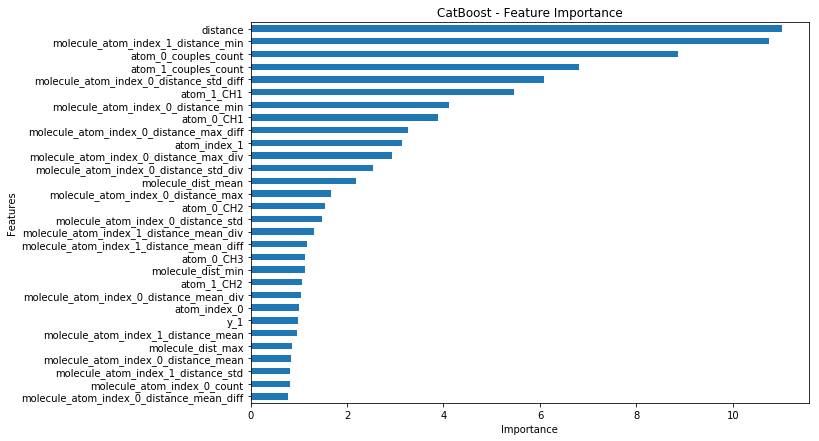

In [37]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)

#### 1JHN

In [38]:
coupling_type = '1JHN'
model = model_map[coupling_type]
y_pred = model.predict(train_map_split[coupling_type][1])

In [39]:
show_scores(train_map_split[coupling_type][3], y_pred)

Variance_Score(cat_Regressor)	:0.9750208042502584
Mean_Absolute_Error(cat_Regressor)	:1.2027936896520528
Mean_Squared_Error(cat_Regressor)	:3.0050552888841975
R2-Score(cat_Regressor)	:0.9750187897146733


In [ ]:
# no one-hot encoding 2000 iter - NO EXTRA FEATURE ENHANCEMENTS
Variance_Score(cat_Regressor)	:0.9298085539454239
Mean_Absolute_Error(cat_Regressor)	:2.0511599010813986
Mean_Squared_Error(cat_Regressor)	:8.445888514171434
R2-Score(cat_Regressor)	:0.9297888069482795

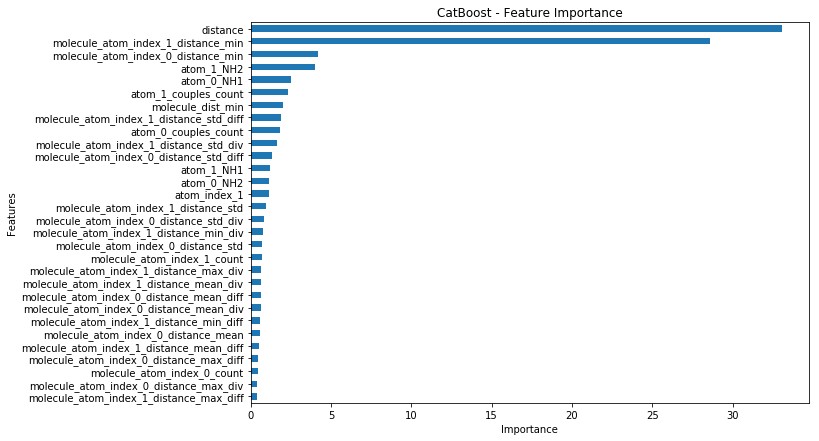

In [40]:
show_feature_importance(model, train_map_split[coupling_type][0].columns)